# Metody Obliczeniowe w Nauce i Technice Laboratorium 9
## Zastosowania DFT
### Paweł Gorgolewski

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

def qr(A):
    n = len(A)
    Q = np.copy(A)
    R = np.zeros((n, n))

    for k in range(0, n):
        for i in range(0, k):
            Q[:,k] -= (Q[:,i] @ A[:,k]) * Q[:,i]
        Q[:,k] = normalize(Q[:,k])

    for i in range(0, n):
        for j in range(i, n):
            R[i,j] = np.dot(Q[:,i], A[:,j])

    return Q, R

test

In [99]:
def test_randoms(n_shapes, debug=False):
    for n in n_shapes:
        A = np.random.rand(n, n)

        Q, R = qr(A)
        Q_np, R_np = np.linalg.qr(A)

        if debug:
            print(f"A:\n{A}", end='\n\n')
            print(f"Q:\n{Q}")
            print(f"Q from numpy:\n{Q_np}", end='\n\n')
            print(f"R:\n{R}")
            print(f"R from numpy:\n{R_np}", end='\n\n')

        np.testing.assert_allclose(Q @ R, Q_np @ R_np)
        print(f"EVERYTHING FINE FOR {n}")

In [100]:
test_randoms(n_shapes=[3,5,8,10,15])

EVERYTHING FINE FOR 3
EVERYTHING FINE FOR 5
EVERYTHING FINE FOR 8
EVERYTHING FINE FOR 10
EVERYTHING FINE FOR 15


In [128]:
#https://math.stackexchange.com/questions/198515/can-we-generate-random-singular-matrices-with-desired-condition-number-using-mat
def generate_n_eights(n):
    A = np.random.rand(8, 8)
    U, _, V = np.linalg.svd(A)
    initial_cond = 1

    matrixes = []
    for i in range(n):
        D = np.linspace(initial_cond,1,8)
        initial_cond *= 1 + np.random.random()
        matrixes.append(U @ np.diag(D) @ V)

    return matrixes

def get_plot(matrixes_num=50):
    matrixes = generate_n_eights(matrixes_num)
    conds = []
    diffs = []
    for A in matrixes:
        Q, R = qr(A)

        norm = np.linalg.norm(np.identity(8) - Q.T @ Q)
        cond = np.linalg.cond(A)
        conds.append(cond)
        diffs.append(norm)

    plt.plot(conds, diffs, marker='+', linestyle="None")
    plt.show()

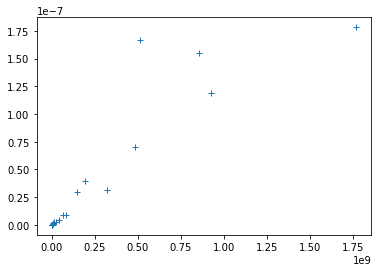

In [129]:
get_plot(matrixes_num=50)